In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [61]:
df = pd.read_csv('/content/TikTok_songs_2020.csv')

In [62]:
df.shape

(292, 18)

In [63]:
df.head()

track_name          artist_name  artist_pop  \
0                            Say So             Doja Cat          88   
1                   Blinding Lights           The Weeknd          93   
2  Supalonely (feat. Gus Dapperton)                BENEE          67   
3                            Savage  Megan Thee Stallion          82   
4                Moral of the Story                 Ashe          68   

                album  track_pop  danceability  energy  loudness  mode  key  \
0            Hot Pink         80         0.787   0.673    -4.583     0   11   
1         After Hours         90         0.514   0.730    -5.934     1    1   
2             Hey u x         63         0.862   0.631    -4.746     1    7   
3                Suga         70         0.843   0.741    -5.609     1   11   
4  Moral of the Story         76         0.572   0.406    -8.624     1   10   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1590       0.26400          0.000003    0.0904    0.779  110.962   
1       0.0598       0.00146          0.000095    0.0897    0.334  171.005   
2       0.0515       0.29100          0.000209    0.1230    0.841  128.978   
3       0.3340       0.02520          0.000000    0.0960    0.680  168.983   
4       0.0427       0.58700          0.000004    0.1020    0.265  119.812   

   time_signature  duration_ms  
0               4       237893  
1               4       200040  
2               4       223488  
3               4       155497  
4               4       201084

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        292 non-null    object 
 1   artist_name       292 non-null    object 
 2   artist_pop        292 non-null    int64  
 3   album             292 non-null    object 
 4   track_pop         292 non-null    int64  
 5   danceability      292 non-null    float64
 6   energy            292 non-null    float64
 7   loudness          292 non-null    float64
 8   mode              292 non-null    int64  
 9   key               292 non-null    int64  
 10  speechiness       292 non-null    float64
 11  acousticness      292 non-null    float64
 12  instrumentalness  292 non-null    float64
 13  liveness          292 non-null    float64
 14  valence           292 non-null    float64
 15  tempo             292 non-null    float64
 16  time_signature    292 non-null    int64  
 1

In [65]:
df.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [66]:
df.sample(2)

track_name  artist_name  \
78   Part of Your World - From "The Little Mermaid"...  Jodi Benson   
206                                            Gangsta      Kehlani   

     artist_pop                     album  track_pop  danceability  energy  \
78           53        The Little Mermaid         60         0.387   0.132   
206          76  SweetSexySavage (Deluxe)         56         0.465   0.446   

     loudness  mode  key  speechiness  acousticness  instrumentalness  \
78    -15.142     1    5       0.0386         0.914          0.000707   
206    -8.336     0   10       0.0433         0.102          0.000000   

     liveness  valence    tempo  time_signature  duration_ms  
78      0.281    0.323  100.000               4       195493  
206     0.321    0.131  121.801               4       177773

In [67]:
df['artist_name'].value_counts()

artist_name
Doja Cat                      10
Lady Gaga                      5
Kesha                          4
Kanye West                     4
Tame Impala                    3
                              ..
YoungBoy Never Broke Again     1
Cochise                        1
Okean Elzi                     1
KyleYouMadeThat                1
Engelwood                      1
Name: count, Length: 229, dtype: int64

<Axes: title={'center': 'Top Ten Artist'}, ylabel='artist_name'>

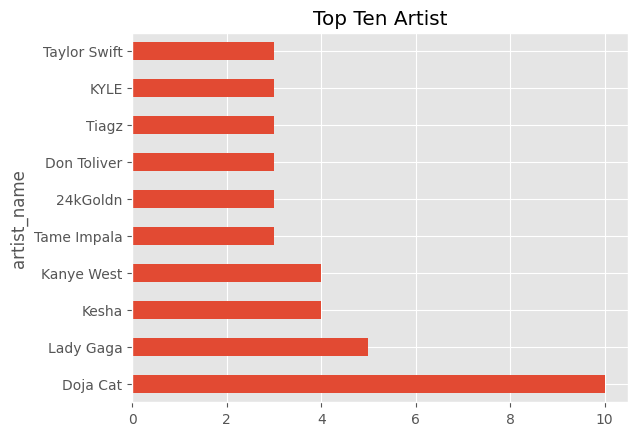

In [68]:
df['artist_name'].value_counts().head(10).plot(kind="barh", title="Top Ten Artist")

In [69]:
df['album'].value_counts()

album
Hot Pink                                        6
Cannibal (Expanded Edition)                     3
Currents                                        2
After Hours                                     2
Please Excuse Me for Being Antisocial           2
                                               ..
Out of the Blue                                 1
Eternal Atake (Deluxe) - LUV vs. The World 2    1
I'm Looking for Mrs. Bubblegum                  1
BEYONCÉ [Platinum Edition]                      1
Crust FM                                        1
Name: count, Length: 274, dtype: int64

<Axes: title={'center': 'Top Ten Album'}, ylabel='album'>

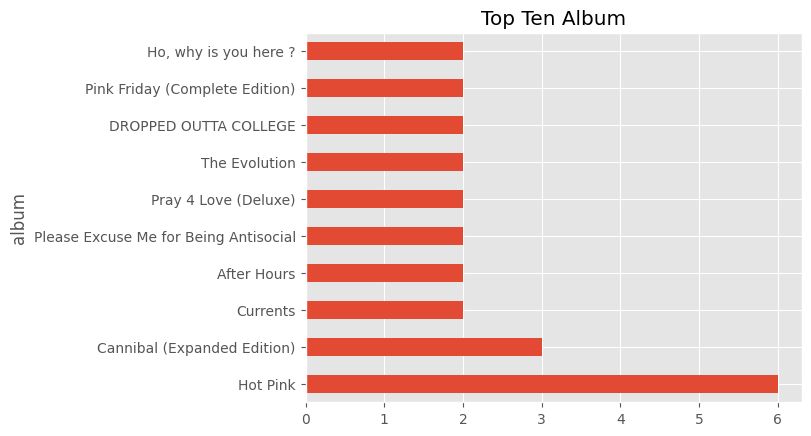

In [70]:
df['album'].value_counts().head(10).plot(kind="barh", title="Top Ten Album")

In [71]:
df["duration_ms"].mean()

192805.2123287671

In [72]:
df[df["duration_ms"] > 190000].shape

(147, 18)

In [73]:
df['time_signature'].value_counts()

time_signature
4    278
3     11
1      2
5      1
Name: count, dtype: int64

<Axes: title={'center': 'Time Signature'}, xlabel='time_signature'>

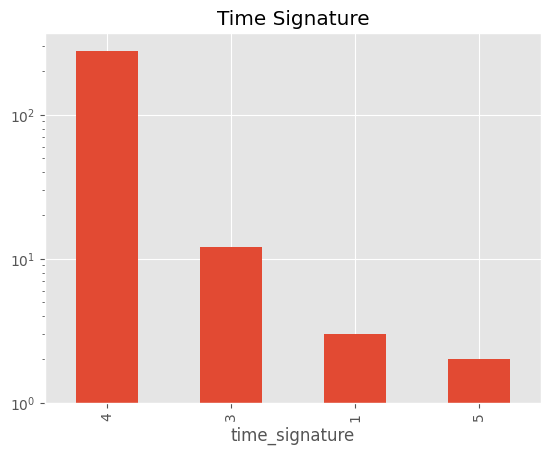

In [74]:
df['time_signature'].value_counts().plot(kind="bar", title="Time Signature", log=True)

In [75]:
df.sample(2)

track_name      artist_name  artist_pop  \
80           Borderline      Tame Impala          78   
229  Another Day Of Sun  La La Land Cast          46   

                                               album  track_pop  danceability  \
80                                     The Slow Rush         78         0.621   
229  La La Land (Original Motion Picture Soundtrack)         64         0.588   

     energy  loudness  mode  key  speechiness  acousticness  instrumentalness  \
80    0.873    -3.067     0    5       0.0369        0.0406          0.000009   
229   0.742    -6.757     1    8       0.0528        0.0162          0.000004   

     liveness  valence    tempo  time_signature  duration_ms  
80     0.0824    0.873   97.960               4       237800  
229    0.6530    0.824  125.819               4       228173

In [76]:
df.drop(columns=['mode','mode','valence'], inplace=True)

In [77]:
df.sample(2)

track_name      artist_name  artist_pop  \
75                        ROXANNE   Arizona Zervas          66   
266  Interior Crocodile Alligator  Chip Tha Ripper          45   

                            album  track_pop  danceability  energy  loudness  \
75                        ROXANNE         78         0.621   0.601    -5.616   
266  Interior Crocodile Alligator         45         0.742   0.727    -6.914   

     key  speechiness  acousticness  instrumentalness  liveness    tempo  \
75     6        0.148        0.0522               0.0     0.460  116.735   
266    1        0.487        0.0136               0.0     0.259  178.401   

     time_signature  duration_ms  
75                5       163636  
266               4       110253

In [78]:
df[['track_name', 'artist_name', 'danceability']].sort_values(by='danceability', ascending=False).head(10)

track_name    artist_name  danceability
203              Dancing in My Room       347aidan         0.980
105  I'm Looking for Mrs. Bubblegum       Memetown         0.977
91                        Hood Baby           KBFR         0.974
27           Muffins In The Freezer          Tiagz         0.965
165   Get Up (feat. Chamillionaire)          Ciara         0.964
26               My Heart Went Oops          Tiagz         0.960
213                          Tap In       Saweetie         0.954
270            Go Go Go Who's Next?  Hip Hop Harry         0.950
255                    To the Right         Devour         0.946
139             The Dice Beat Pt. 1  Ricky Desktop         0.946

<Axes: title={'center': 'Top Ten Songs by Danceability'}, ylabel='track_name'>

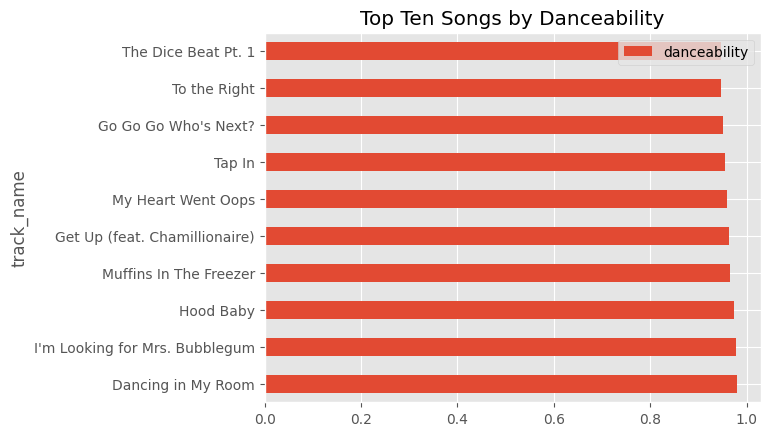

In [79]:
df[['track_name', 'artist_name', 'danceability']].sort_values(by='danceability', ascending=False).head(10).plot\
(kind='barh', x='track_name', y='danceability', title='Top Ten Songs by Danceability')

<Axes: >

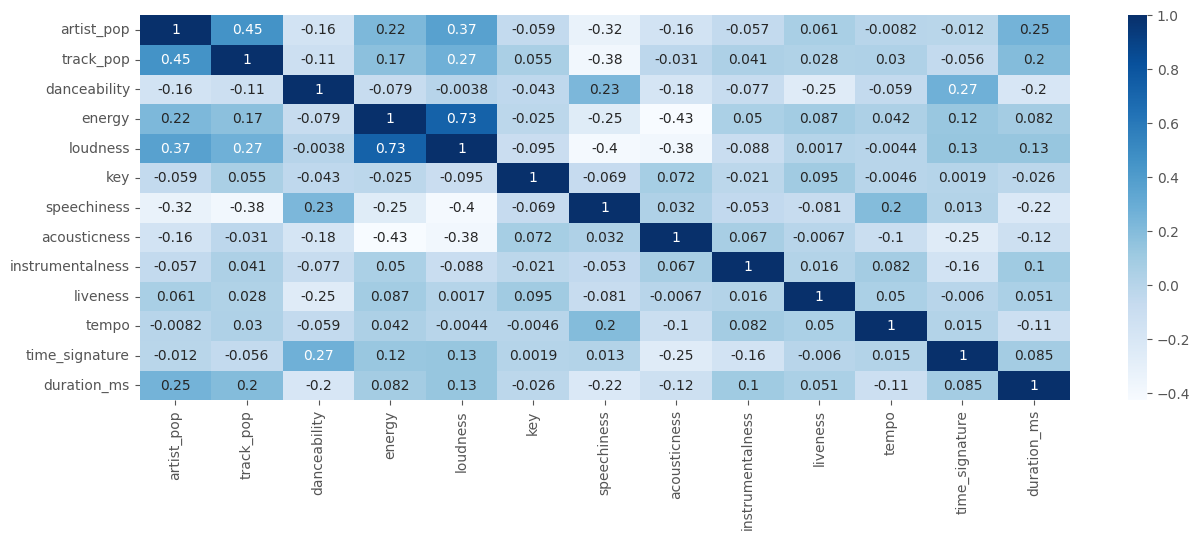

In [80]:
correlation_martrix_1 = df.corr(numeric_only=True)
plt.figure(figsize=(15,5))
sns.heatmap(correlation_martrix_1, annot=True, cmap='Blues')

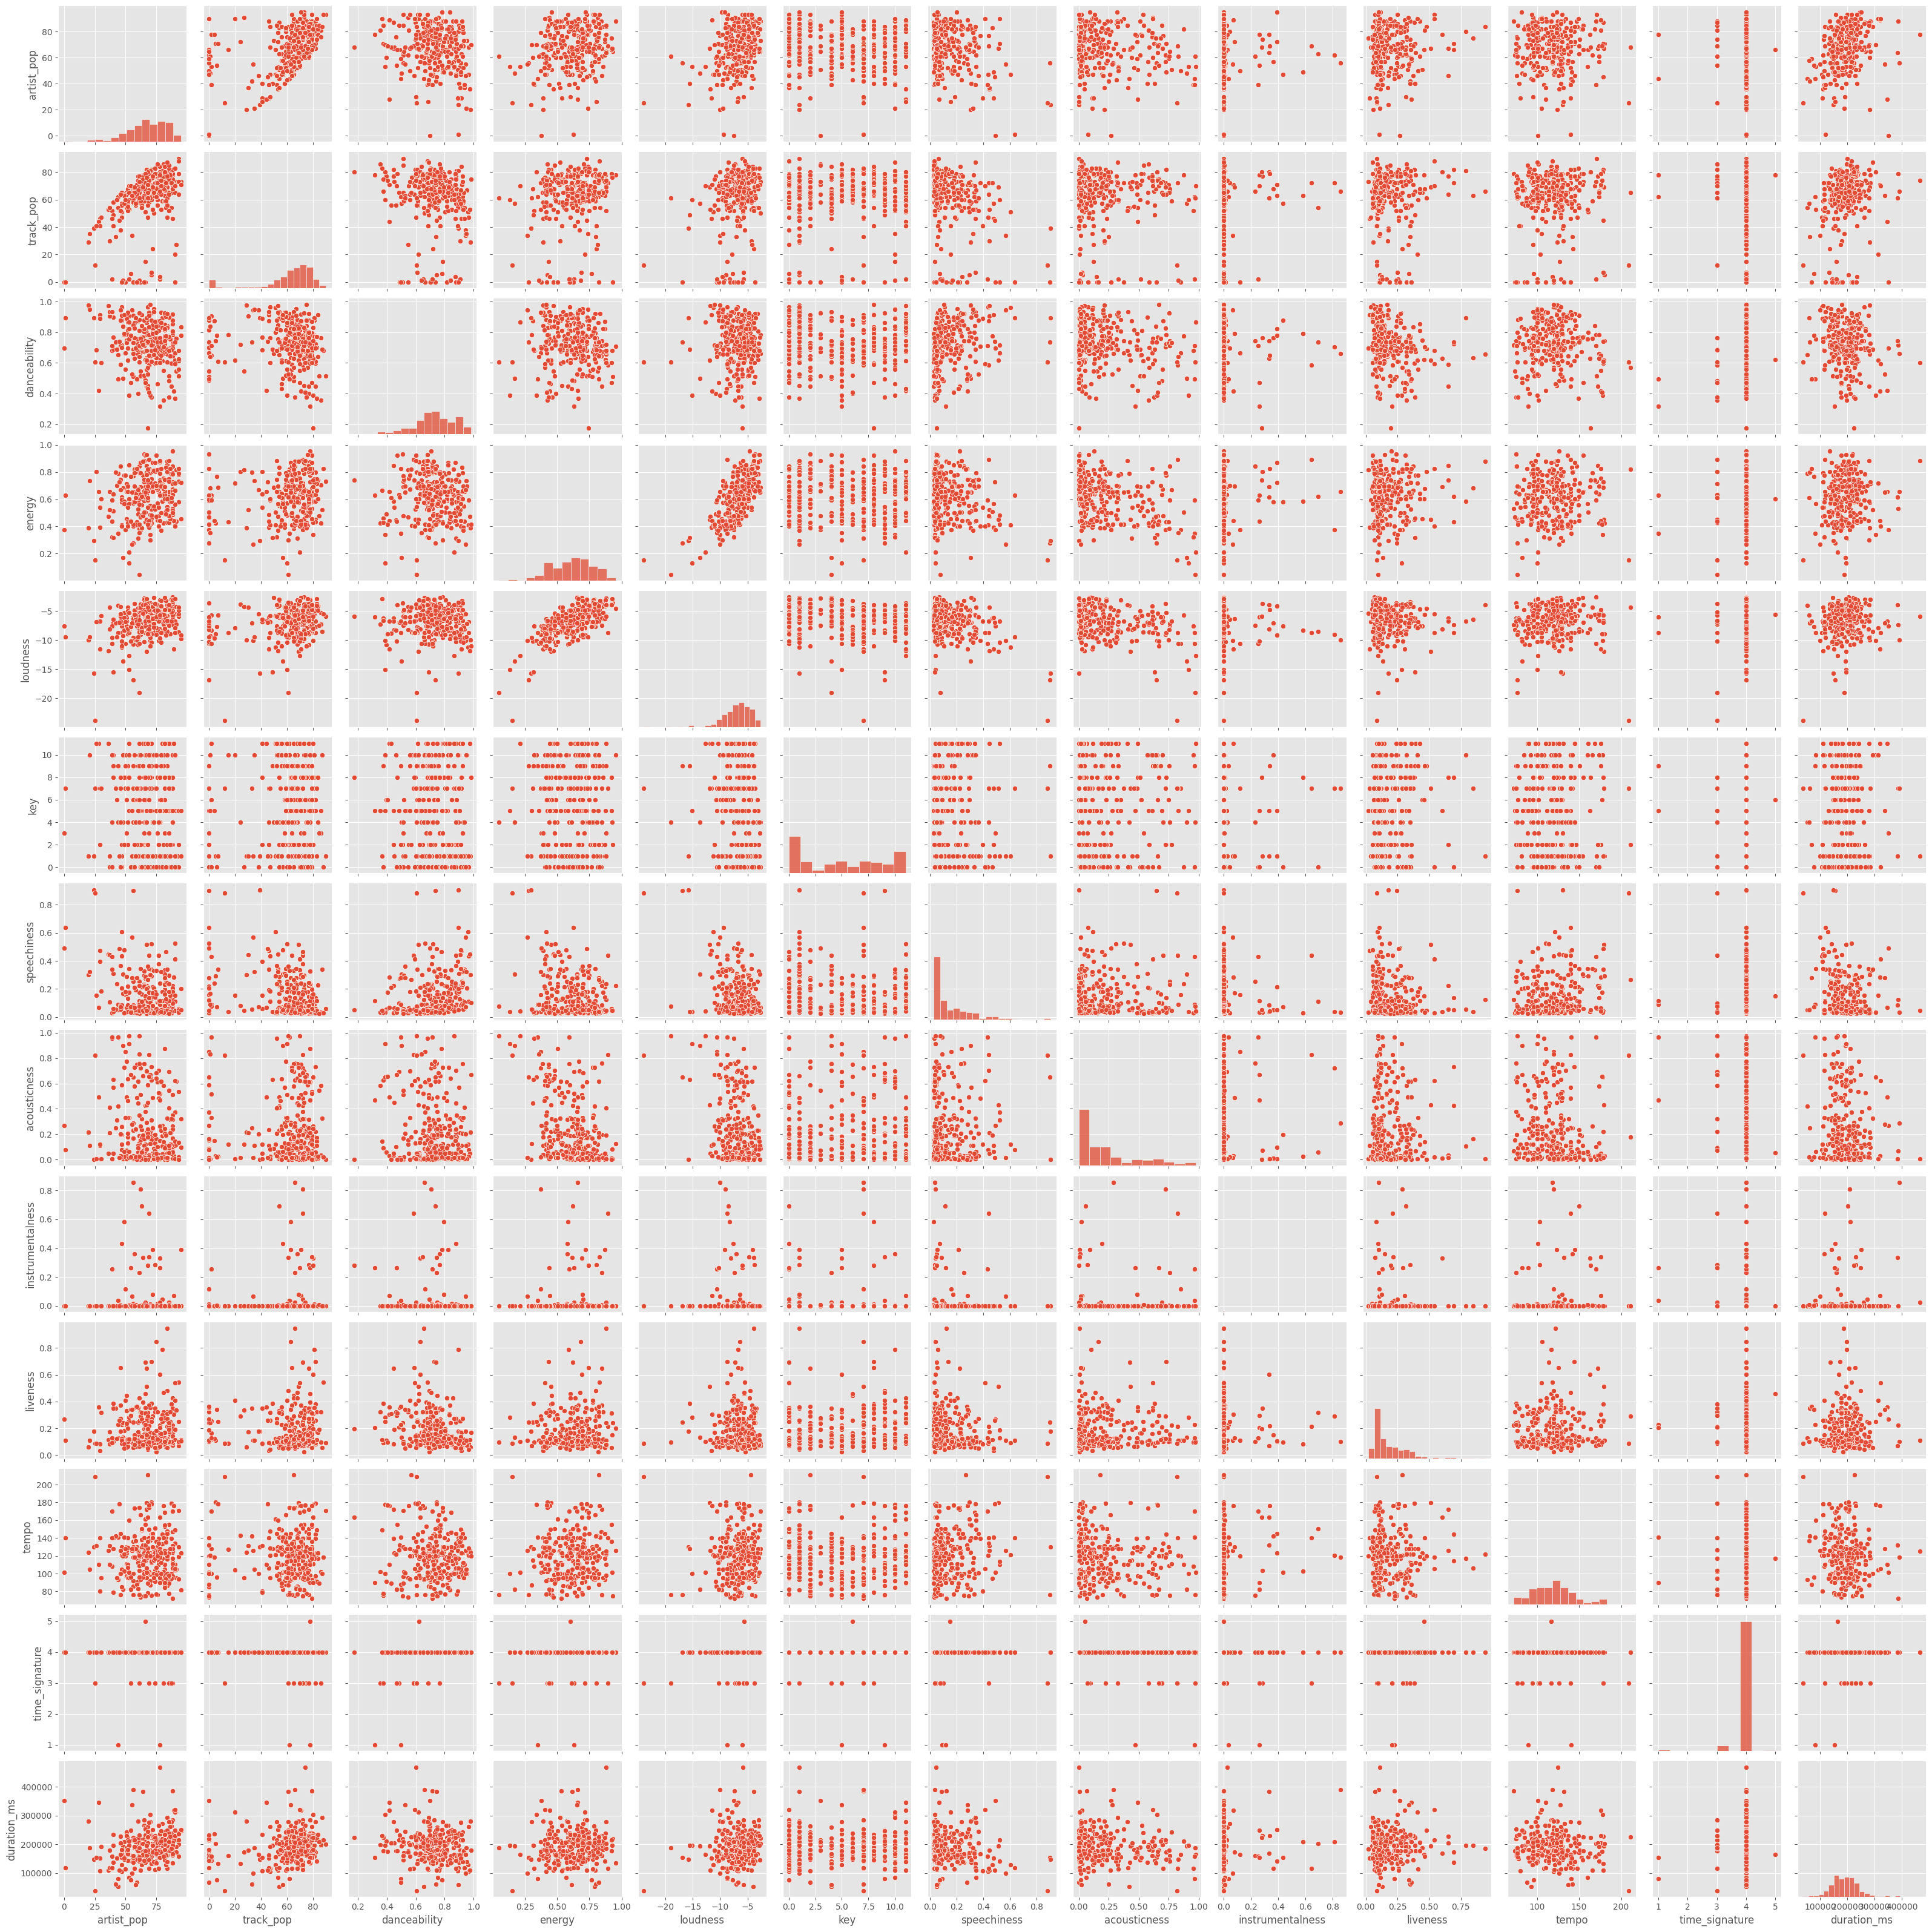

In [81]:
sns.pairplot(df)
plt.show()

In [82]:
df = pd.read_csv('/content/TikTok_songs_2021.csv')

In [83]:
df.shape

(190, 18)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        190 non-null    object 
 1   artist_name       190 non-null    object 
 2   artist_pop        190 non-null    int64  
 3   album             190 non-null    object 
 4   track_pop         190 non-null    int64  
 5   danceability      190 non-null    float64
 6   energy            190 non-null    float64
 7   loudness          190 non-null    float64
 8   mode              190 non-null    int64  
 9   key               190 non-null    int64  
 10  speechiness       190 non-null    float64
 11  acousticness      190 non-null    float64
 12  instrumentalness  190 non-null    float64
 13  liveness          190 non-null    float64
 14  valence           190 non-null    float64
 15  tempo             190 non-null    float64
 16  time_signature    190 non-null    int64  
 1

In [85]:
df.sample(2)

track_name    artist_name  artist_pop              album  \
121  Baby I Got Issues       U/NITISH          46  Baby I Got Issues   
108          positions  Ariana Grande          87          Positions   

     track_pop  danceability  energy  loudness  mode  key  speechiness  \
121         63         0.734   0.495    -8.228     0    2       0.2400   
108         85         0.737   0.802    -4.771     1    0       0.0878   

     acousticness  instrumentalness  liveness  valence    tempo  \
121         0.548               0.0    0.1210    0.539  150.044   
108         0.468               0.0    0.0931    0.682  144.015   

     time_signature  duration_ms  
121               4       164955  
108               4       172325

In [86]:
df.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [87]:
df['artist_name'].value_counts()

artist_name
Justin Bieber        7
Doja Cat             5
Olivia Rodrigo       4
Ariana Grande        3
Katy Perry           3
                    ..
Nelly                1
Daya                 1
Eduardo Luzquiños    1
Sara Bareilles       1
ZAAC                 1
Name: count, Length: 156, dtype: int64

<Axes: title={'center': 'Top Ten Artist'}, ylabel='artist_name'>

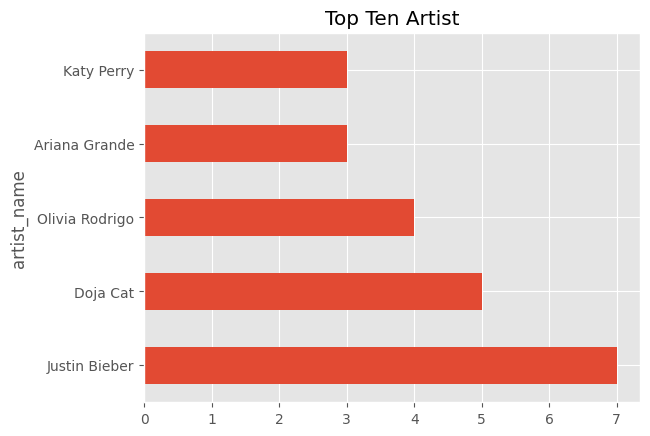

In [88]:
df['artist_name'].value_counts().head().plot(kind="barh", title="Top Ten Artist")

In [89]:
df['album'].value_counts()

album
Planet Her                      4
Positions                       3
SOUR                            3
Justice                         3
My World                        3
                               ..
Safe Haven                      1
You're Perfect                  1
My Universe                     1
Butter / Permission to Dance    1
Desce Pro Play (PA PA PA)       1
Name: count, Length: 174, dtype: int64

<Axes: title={'center': 'Most used albums'}, ylabel='album'>

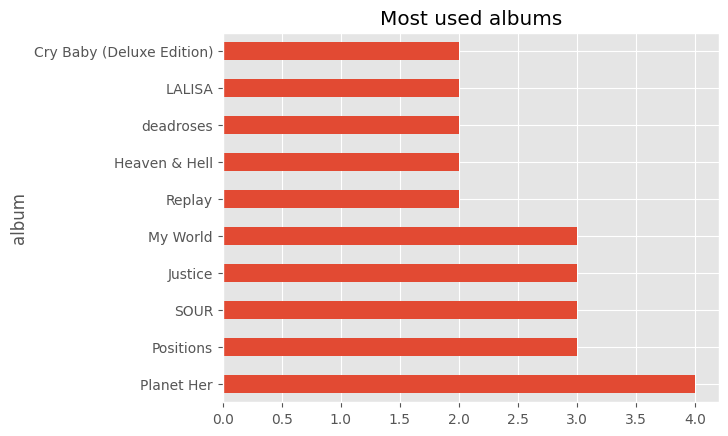

In [90]:
df['album'].value_counts().head(10).plot(kind="barh", title="Most used albums")

In [91]:
df.sample(4)

track_name   artist_name  artist_pop                  album  \
66    You're Perfect  Charly Black          60         You're Perfect   
41   Please Don't Go   Mike Posner          70  31 Minutes to Takeoff   
167          abcdefu         GAYLE          71                abcdefu   
86        Hot N Cold    Katy Perry          83        One Of The Boys   

     track_pop  danceability  energy  loudness  mode  key  speechiness  \
66          57         0.817   0.855    -3.282     0    7       0.2440   
41          68         0.699   0.882    -3.896     0    4       0.0311   
167         87         0.695   0.540    -5.692     1    4       0.0493   
86          70         0.706   0.841    -3.956     1    7       0.0418   

     acousticness  instrumentalness  liveness  valence    tempo  \
66       0.318000            0.0000    0.0517    0.783  104.909   
41       0.002960            0.0544    0.1300    0.657  120.016   
167      0.299000            0.0000    0.3670    0.415  121.932   
86       0.000079            0.0000    0.0688    0.861  132.032   

     time_signature  duration_ms  
66                4       196973  
41                4       196813  
167               4       168602  
86                4       220227

In [92]:
df[['track_name', 'artist_name', 'duration_ms', 'danceability']].sort_values(by='danceability', ascending=False).head(10)

track_name         artist_name  \
51                                          Dangerous  Kardinal Offishall   
74                                           My Lecon                 JTL   
27                                           Caroline               Aminé   
89                       Bundles (feat. Taylor Girlz)        Kayla Nicole   
189                         Desce Pro Play (PA PA PA)                ZAAC   
155                                            Me Too      Meghan Trainor   
28                                             Ратата              Konfuz   
143                                Low (feat. T-Pain)            Flo Rida   
110                                  Calling My Phone            Lil Tjay   
42   Renai Circulation (English Cover) [2012 TV Size]       Lizz Robinett   

     duration_ms  danceability  
51        246053         0.949  
74        206200         0.945  
27        209640         0.940  
89        154806         0.939  
189       168507         0.935  
155       181240         0.934  
28        137077         0.921  
143       231400         0.918  
110       205458         0.907  
42         91067         0.896

<Axes: title={'center': 'Top Ten Songs by acousticness'}, ylabel='track_name'>

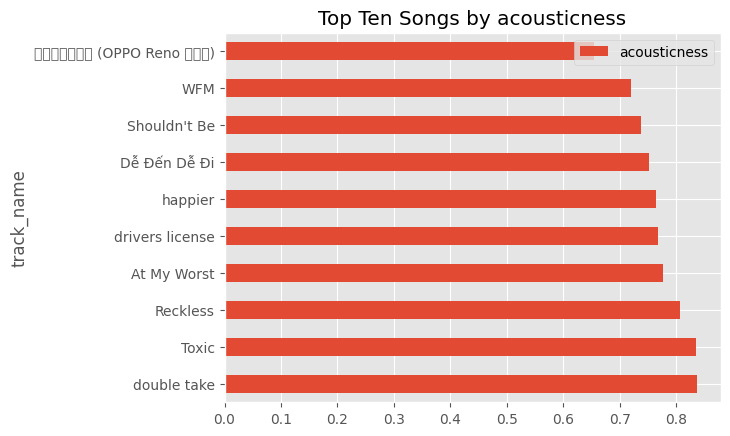

In [93]:
df[['track_name','acousticness']].sort_values(by='acousticness', ascending=False).head(10).plot(\
kind='barh', x='track_name', y='acousticness', title='Top Ten Songs by acousticness')

<Axes: title={'center': 'Top Ten Songs by Danceability'}, ylabel='track_name'>

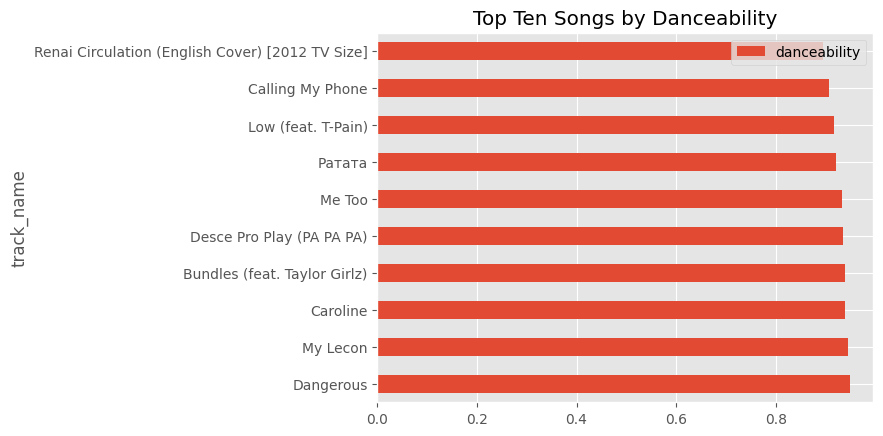

In [94]:
df[['track_name','danceability']].sort_values(by='danceability', ascending=False).head(10).plot(\
kind='barh', x='track_name', y='danceability', title='Top Ten Songs by Danceability')

In [95]:
df.sample(2)

track_name  artist_name  artist_pop         album  track_pop  \
60  At My Worst  Pink Sweat$          69   The Prelude         74   
27     Caroline        Aminé          69  Good For You         73   

    danceability  energy  loudness  mode  key  speechiness  acousticness  \
60         0.813   0.415    -5.926     1    0       0.0349         0.777   
27         0.940   0.335   -10.179     0    5       0.5050         0.170   

    instrumentalness  liveness  valence    tempo  time_signature  duration_ms  
60               0.0     0.131    0.667   91.921               4       170345  
27               0.0     0.262    0.707  120.040               4       209640

In [96]:
df.groupby('artist_name')['track_name'].count().sort_values(ascending=False).head(10)

artist_name
Justin Bieber     7
Doja Cat          5
Olivia Rodrigo    4
Lil Nas X         3
Katy Perry        3
Ariana Grande     3
blackbear         3
Iyaz              2
DJ Snake          2
Ne-Yo             2
Name: track_name, dtype: int64

<Axes: title={'center': 'Top Ten Artist with tracks count'}, ylabel='artist_name'>

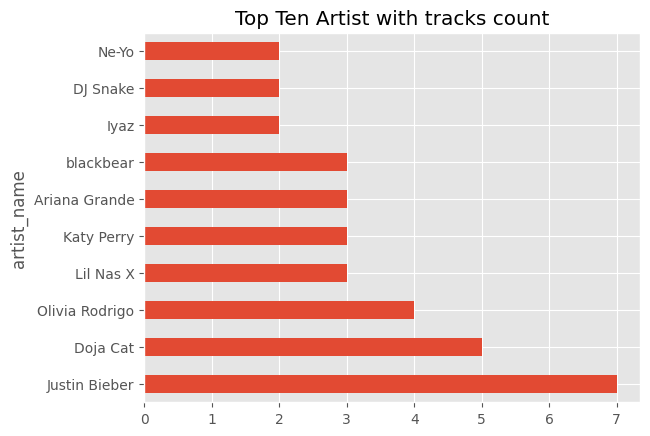

In [97]:
df.groupby('artist_name')['track_name'].count().sort_values(ascending=False).head(10).plot(kind="barh", title="Top Ten Artist with tracks count")

In [98]:
df['duration_ms'].mean()

194612.56315789474

<Axes: >

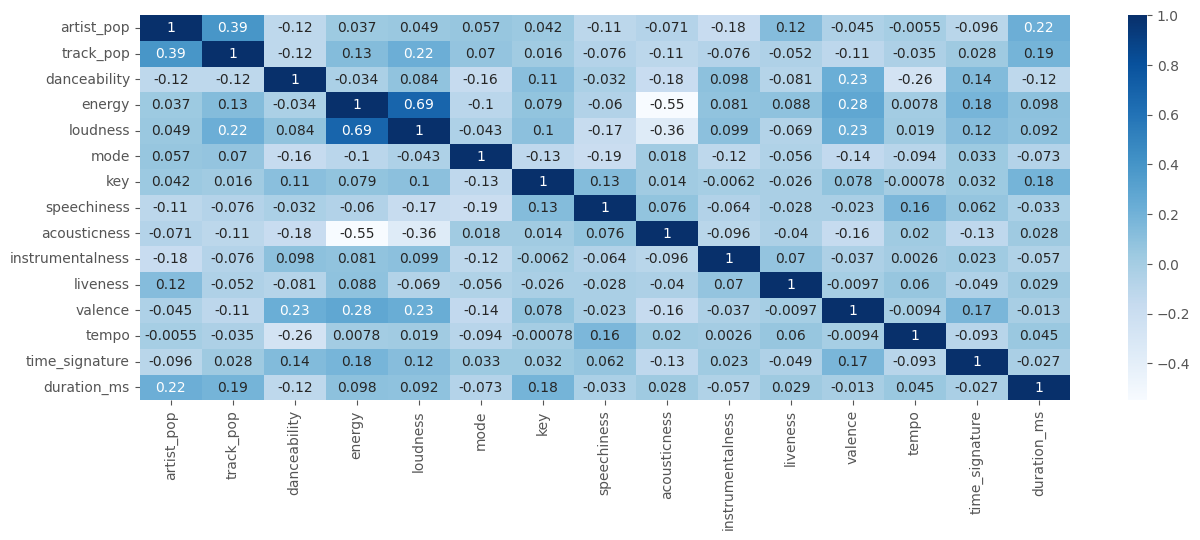

In [99]:
correlation_matrix_2  = df.corr(numeric_only=True)
plt.figure(figsize=(15,5))
sns.heatmap(correlation_matrix_2, annot=True, cmap='Blues')

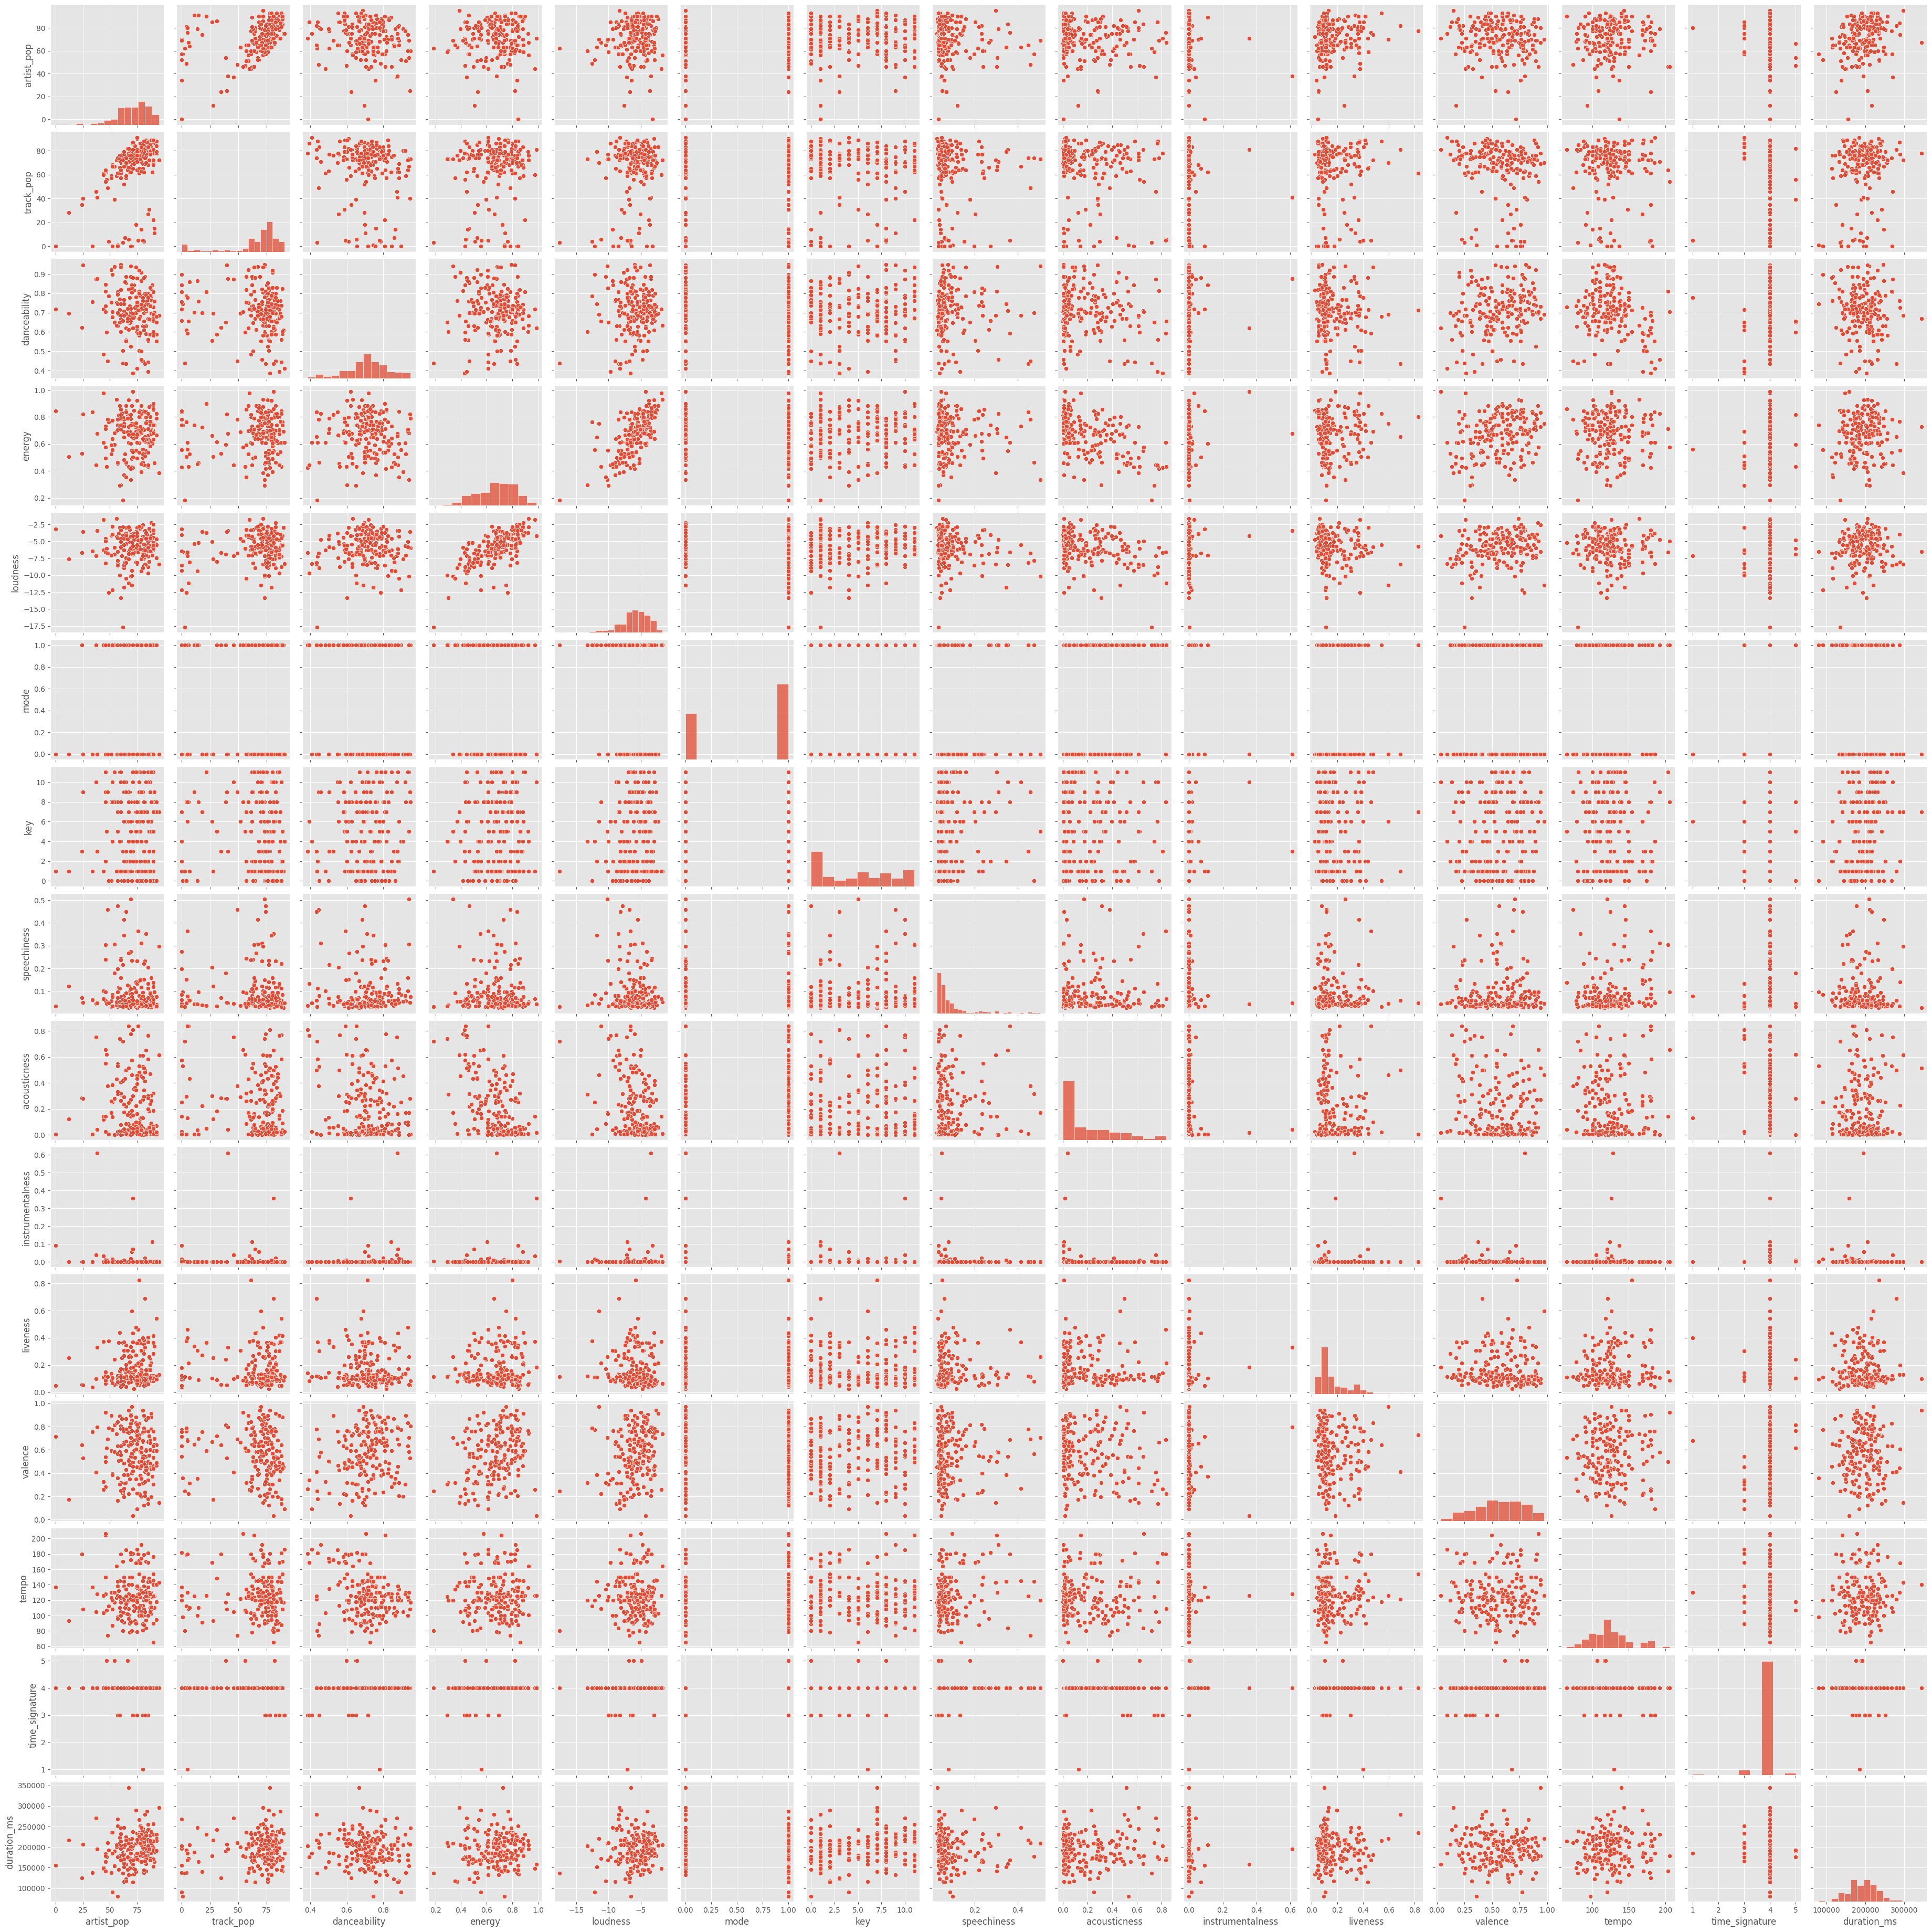

In [100]:
sns.pairplot(df)
plt.show()

In [101]:
df = pd.read_csv('/content/TikTok_songs_2022.csv')

In [102]:
df.shape

(263, 18)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [104]:
df.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [105]:
df.head()

track_name    artist_name  artist_pop  \
0  Running Up That Hill (A Deal With God)      Kate Bush          81   
1                               As It Was   Harry Styles          91   
2                                 Sunroof    Nicky Youre          73   
3                              Heat Waves  Glass Animals          80   
4                         About Damn Time          Lizzo          81   

                        album  track_pop  danceability  energy  loudness  \
0              Hounds Of Love         95         0.629   0.547   -13.123   
1                   As It Was         96         0.520   0.731    -5.338   
2                     Sunroof         44         0.768   0.716    -5.110   
3  Dreamland (+ Bonus Levels)         89         0.761   0.525    -6.900   
4             About Damn Time         92         0.836   0.743    -6.305   

   mode  key  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0   10       0.0550        0.7200          0.003140    0.0604    0.197   
1     0    6       0.0557        0.3420          0.001010    0.3110    0.662   
2     1   10       0.0404        0.3500          0.000000    0.1500    0.841   
3     1   11       0.0944        0.4400          0.000007    0.0921    0.531   
4     0   10       0.0656        0.0995          0.000000    0.3350    0.722   

     tempo  time_signature  duration_ms  
0  108.375               4       298933  
1  173.930               4       167303  
2  131.430               4       163026  
3   80.870               4       238805  
4  108.966               4       191822

In [107]:
df['artist_name'].value_counts()

artist_name
Doja Cat      8
Coopex        6
Dame Dame     5
Lil Nas X     4
Farux         4
             ..
bbno$         1
Goya Menor    1
Why Not       1
Emmy Meli     1
Sub Urban     1
Name: count, Length: 199, dtype: int64

<Axes: title={'center': 'Top Ten Artist'}, ylabel='artist_name'>

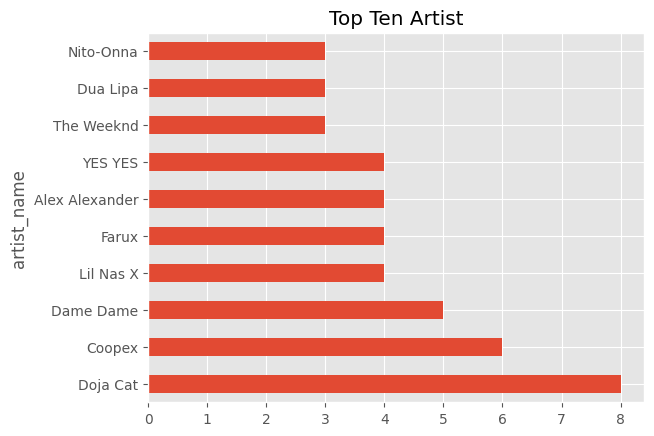

In [108]:
df['artist_name'].value_counts().head(10).plot(kind="barh", title="Top Ten Artist")

In [110]:
df['album'].value_counts()

album
Planet Her                              4
Shoot For The Stars Aim For The Moon    3
As It Was                               2
Future Nostalgia                        2
Say It Right                            2
                                       ..
Ocean Drive                             1
Kiss Me More (feat. SZA)                1
Chosen                                  1
The Hills                               1
INFERNO                                 1
Name: count, Length: 251, dtype: int64

<Axes: title={'center': 'Most used albums'}, ylabel='album'>

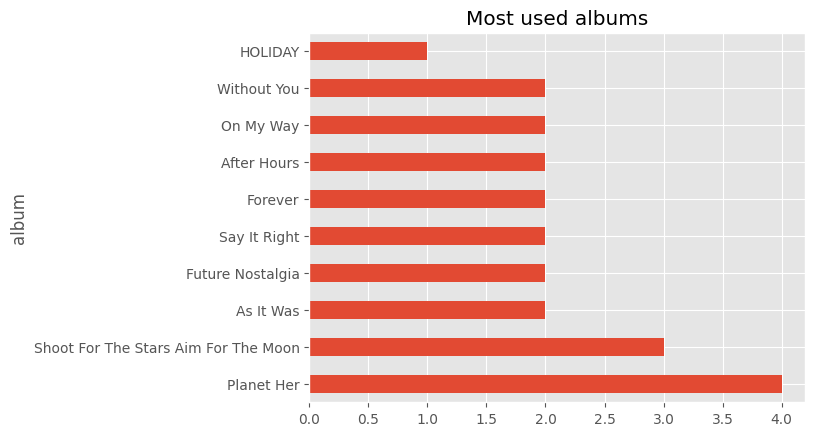

In [111]:
df['album'].value_counts().head(10).plot(kind="barh", title="Most used albums")

In [113]:
df['duration_ms'].mean()

174656.21292775666

<Axes: title={'center': 'Top Ten Songs by Danceability'}, ylabel='track_name'>

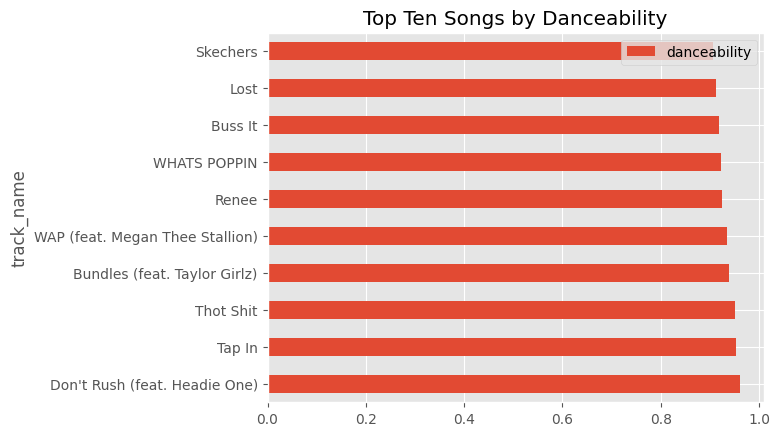

In [118]:
df[['track_name', 'artist_name', 'danceability']].sort_values(by='danceability', ascending=False).head(10).plot(\
kind='barh', x='track_name', y='danceability', title='Top Ten Songs by Danceability')

<Axes: >

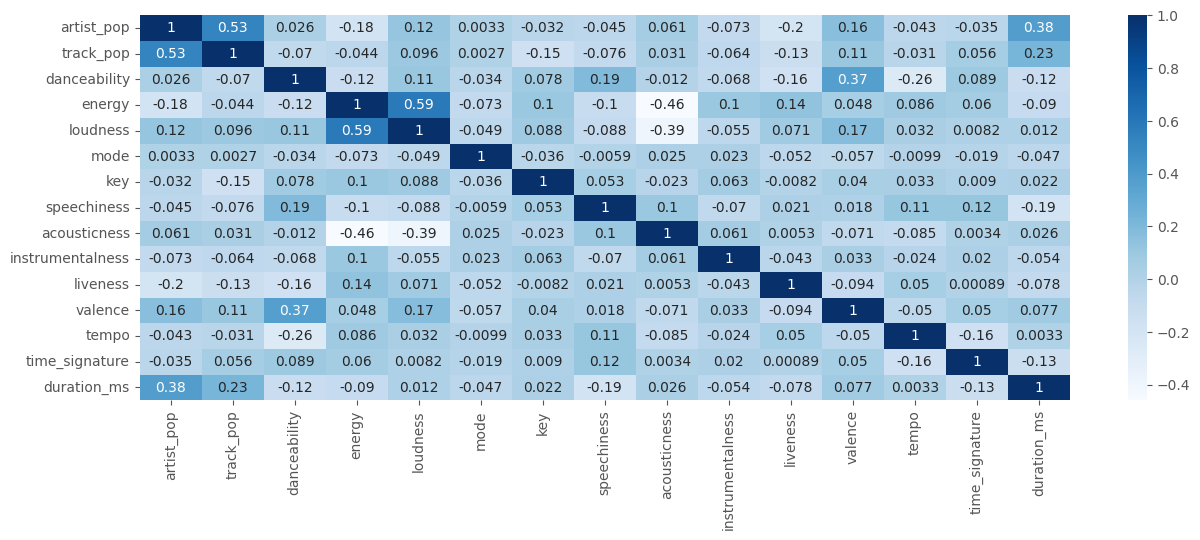

In [120]:
correlation_martix_3 = df.corr(numeric_only=True)
plt.figure(figsize=(15,5))
sns.heatmap(correlation_martix_3, annot=True, cmap='Blues')